In [ ]:
%%shell
rm -rf fdd
git clone https://github.com/Davidvandijcke/fdd.git
pip install geopandas folium matplotlib mapclassify contextily rasterio scikit-image geocube pandas==2.0.0



Cloning into 'fdd'...
remote: Enumerating objects: 402, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 402 (delta 31), reused 32 (delta 14), pack-reused 352
Receiving objects: 100% (402/402), 2.22 MiB | 32.42 MiB/s, done.
Resolving deltas: 100% (254/254), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 112.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 104.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.4/114.4 kB 15.5 MB/s eta 0:00:00
     ━━━

In [ ]:
%load_ext autoreload
%autoreload 2
import os
os.chdir("./fdd/src/FDD")
from FDD import FDD

In [ ]:
# load libraries
import geopandas as gpd
import numpy as np
import os
import urllib
import zipfile
import re
#from geocube.api.core import make_geocube
import rasterio as rio
from rasterio.mask import mask
from rasterio.transform import from_origin
from skimage import data, img_as_float, io
from skimage.segmentation import chan_vese
from PIL import Image
import matplotlib.pyplot as plt
from scipy.io import loadmat
from geocube.api.core import make_geocube

In [ ]:
# mount google drive and set paths
from google.colab import drive
drive.mount("/drive", force_remount=True)

Mounted at /drive


In [ ]:
# # set path
bsdir = f"/drive/MyDrive/fdd/" # set to desired directory
os.chdir("../..")

## Now let's segment the map of mobile device activity

In [ ]:
all = gpd.read_file(bsdir + "front/" + "grid.geojson")



In [ ]:
all[all.geometry.isna()].head()

Empty GeoDataFrame
Columns: [index, week, index_right, count, devices, count_jan, devices_jan, count_ratio, devices_ratio, geometry]
Index: []

In [ ]:
grid = all[all.week == 20]

In [ ]:
grid.explore(column='count_ratio', cmap='Reds', legend=True,  vmax = 1)

In [ ]:
grid['count_ratio'].max() #quantile(0.95)

70.66666666666667

In [ ]:
X1 = np.array(grid.geometry.centroid.x)
X2 = np.array(grid.geometry.centroid.y)
X = np.stack([X1, X2], axis = 1)

Y = np.array(grid['count_ratio'])
Y[Y > 1] = 1 # 0.5

In [ ]:
# as image
X1_width = 10000 #np.diff(np.unique(X1)).min()
X2_width = 10000 # np.diff(np.unique(X2)).min()
X = np.stack(np.meshgrid(*[np.arange(X1.min(), X1.max(), X1_width), np.arange(X2.min(), X2.max(), X2_width)]), axis = -1)

In [ ]:
# TODO: rectangular arrays

(88, 132, 2)

In [ ]:
# segment
#--------
# parameters
S=16
N = Y.shape[0]
#--------
#resolution = 1/int(np.sqrt(N*2/3))
model = FDD(Y, X, level = S, lmbda = 1, nu = 0.001, iter = 10000, tol = 5e-5, pick_nu = "MS")
model.nu = 0.04
model.lmbda = 200 # 250
u, jumps, J_grid, nrj, eps, it = model.run()

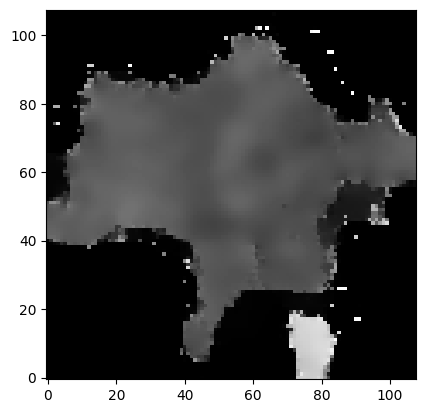

In [ ]:
plt.imshow(u, origin ="lower", cmap = "gray")
plt.show()

In [ ]:
it

0

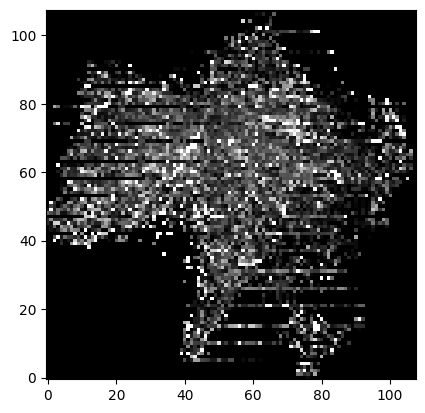

In [ ]:
plt.imshow(model.grid_y, origin = "lower", cmap = "gray")
plt.show()


In [ ]:
np.array([])

array([], dtype=float64)

In [ ]:
X.shape

(11837, 2)

In [ ]:
np.sqrt(11837)

108.79797792238604